
<h1>            ANALYSING TALLY DATA AND PROVIDING PRECIOUS INSIGHTS</h1>



<h2>IMPORTING DEPENDENCIES</h2>


In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


## TAKING DATA FROM TWO TALLY SHEETS OF DIFFERENT FINANCIAL YEAR

In [50]:
df1 = pd.read_excel("C:\\Users\\yashs\\Downloads\\tally 22-23.xlsx", engine="openpyxl")
df2 = pd.read_excel(r"C:\Users\yashs\Downloads\tally23-24.xlsx", engine="openpyxl")

## PREPROCESSING AND EXPLORING DATA

In [51]:
df1.head(10)

,Date,Particulars,Vch Type,Vch No.,Debit,Credit
0,2022-04-01,Computer - Software,Journal,1,614.0,NaN
1,2022-04-04,Rep & Maint - General,PMT LUC - CASH,1,200.0,NaN
2,2022-04-15,Courier Charges,PMT LUC - CASH,2,120.0,NaN
3,2022-04-17,Garden Expenses,PMT LUC - CASH,3,360.0,NaN
4,2022-04-17,Rep & Maint - General,PMT LUC - CASH,4,2000.0,NaN
5,2022-04-17,O/S Liabilities (2021-22),PMT LUC - CASH,5,589.0,NaN
6,2022-04-21,Electricity Expenses,PMT LUC - BANK,1,1168.0,NaN
7,2022-04-30,Salaries,PMT LUC - CASH,6,6600.0,NaN
8,2022-05-01,Salaries,PMT LUC - CASH,7,5000.0,NaN
9,2022-05-01,Housekeeping Comsumables,PMT LUC - CASH,8,1800.0,NaN


In [52]:
df1[['Debit','Credit']].describe()

,Debit,Credit
count,222.000000,18.000000
mean,16375.905405,81074.888889
std,76051.275156,124303.276222
min,100.000000,1063.000000
25%,606.500000,12699.750000
50%,3127.000000,50000.000000
75%,5600.000000,60000.000000
max,895787.000000,450000.000000


In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         240 non-null    datetime64[ns]
 1   Particulars  240 non-null    object        
 2   Vch Type     240 non-null    object        
 3   Vch No.      240 non-null    int64         
 4   Debit        222 non-null    float64       
 5   Credit       18 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 11.4+ KB


In [54]:
## SINCE DATE CLASS IS A datetime64 datatype se can directly use dt without converting it into time series object

In [55]:
date =df1['Date'].dt.day 
date

0       1
1       4
2      15
3      17
4      17
       ..
235    31
236    31
237    31
238    31
239    31
Name: Date, Length: 240, dtype: int32

In [56]:
month =df1['Date'].dt.month
month

0      4
1      4
2      4
3      4
4      4
      ..
235    3
236    3
237    3
238    3
239    3
Name: Date, Length: 240, dtype: int32

In [57]:
year=df1['Date'].dt.year
year

0      2022
1      2022
2      2022
3      2022
4      2022
       ... 
235    2023
236    2023
237    2023
238    2023
239    2023
Name: Date, Length: 240, dtype: int32

In [58]:
df1.insert(1,'date',date)

In [59]:
df1.insert(2,'month',month)

In [60]:
df1.insert(3,'year',year)

In [61]:
df1

,Date,date,month,year,Particulars,Vch Type,Vch No.,Debit,Credit
0,2022-04-01,1,4,2022,Computer - Software,Journal,1,614.0,NaN
1,2022-04-04,4,4,2022,Rep & Maint - General,PMT LUC - CASH,1,200.0,NaN
2,2022-04-15,15,4,2022,Courier Charges,PMT LUC - CASH,2,120.0,NaN
3,2022-04-17,17,4,2022,Garden Expenses,PMT LUC - CASH,3,360.0,NaN
4,2022-04-17,17,4,2022,Rep & Maint - General,PMT LUC - CASH,4,2000.0,NaN
...,...,...,...,...,...,...,...,...,...
235,2023-03-31,31,3,2023,"Machinery, Equipment & Vehicles",Journal,16,200.0,NaN
236,2023-03-31,31,3,2023,Donation in Kind - Assets,Journal,17,200.0,NaN
237,2023-03-31,31,3,2023,Lucknow - Delhi (EPF),Journal,18,3300.0,NaN
238,2023-03-31,31,3,2023,Branch Fund,Journal,19,36301.0,NaN


In [62]:
totaldebit=df1['Debit'].sum()

In [63]:
totaldebit

3635451.0

In [64]:
totalcredit=df1['Credit'].sum()

In [65]:
totalcredit

1459348.0

In [66]:
df1.fillna(0,inplace=True)
df1.head(5)

,Date,date,month,year,Particulars,Vch Type,Vch No.,Debit,Credit
0,2022-04-01,1,4,2022,Computer - Software,Journal,1,614.0,0.0
1,2022-04-04,4,4,2022,Rep & Maint - General,PMT LUC - CASH,1,200.0,0.0
2,2022-04-15,15,4,2022,Courier Charges,PMT LUC - CASH,2,120.0,0.0
3,2022-04-17,17,4,2022,Garden Expenses,PMT LUC - CASH,3,360.0,0.0
4,2022-04-17,17,4,2022,Rep & Maint - General,PMT LUC - CASH,4,2000.0,0.0


## BREAKING DOWN DATA BY THE USE OF FUNTIONS SUCH AS GROUPBY AND MELT

In [67]:
monthly_summary = df1.groupby(['year','month']).agg({'Debit': 'sum', 'Credit': 'sum'}).reset_index()

In [68]:
monthly_summary

,year,month,Debit,Credit
0,2022,4,11651.0,0.0
1,2022,5,11909.0,50000.0
2,2022,6,27412.0,0.0
3,2022,7,314291.0,571381.0
4,2022,8,300852.0,66933.0
5,2022,9,79477.0,50000.0
6,2022,10,54336.0,377174.0
7,2022,11,142250.0,50000.0
8,2022,12,252184.0,50000.0
9,2023,1,81249.0,162797.0


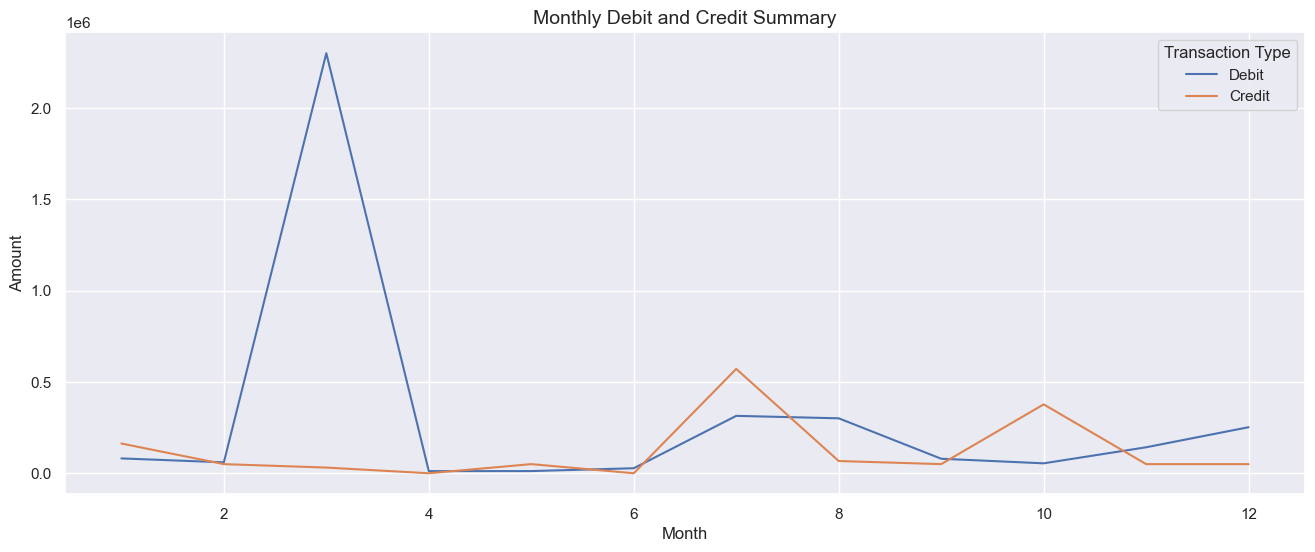

In [69]:
plt.figure(figsize=(16, 6))

debit_plot = sns.lineplot(x='month', y='Debit', data=monthly_summary, label='Debit')
credit_plot = sns.lineplot(x='month', y='Credit', data=monthly_summary, label='Credit')

plt.title('Monthly Debit and Credit Summary', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Amount', fontsize=12)

plt.legend(title='Transaction Type')

plt.show()

In [70]:
df_melted = monthly_summary.melt(id_vars=['month','year'], var_name='variable', value_name='value')
df_melted

,month,year,variable,value
0,4,2022,Debit,11651.0
1,5,2022,Debit,11909.0
2,6,2022,Debit,27412.0
3,7,2022,Debit,314291.0
4,8,2022,Debit,300852.0
5,9,2022,Debit,79477.0
6,10,2022,Debit,54336.0
7,11,2022,Debit,142250.0
8,12,2022,Debit,252184.0
9,1,2023,Debit,81249.0


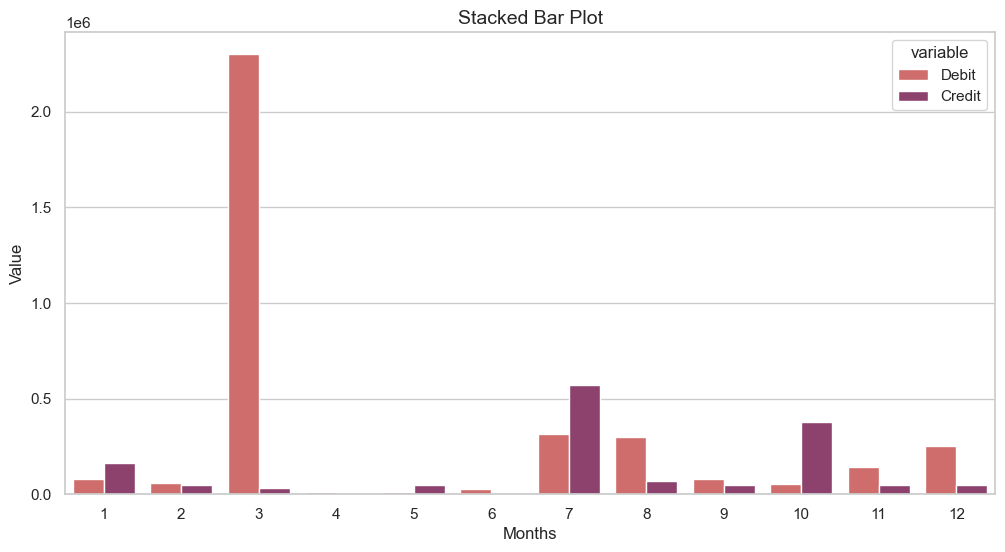

In [71]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x="month", y="value", hue="variable", data=df_melted, palette='flare')

# Add labels and title
plt.xlabel('Months', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.title('Stacked Bar Plot', fontsize=14)
plt.show()

In [72]:
particularscount= df1['Particulars'].value_counts().to_frame().reset_index()
particularscount

,Particulars,count
0,Food Expenses,26
1,Housekeeping Comsumables,25
2,Garden Expenses,20
3,Salaries,20
4,Rep & Maint - General,17
5,Courier Charges,14
6,Lucknow - Delhi,13
7,Internet Expenses,12
8,Electricity Expenses,11
9,Wooden Cabinet 22-23,11


C:\Users\yashs\AppData\Local\Temp\ipykernel_39404\1301094005.py:7: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



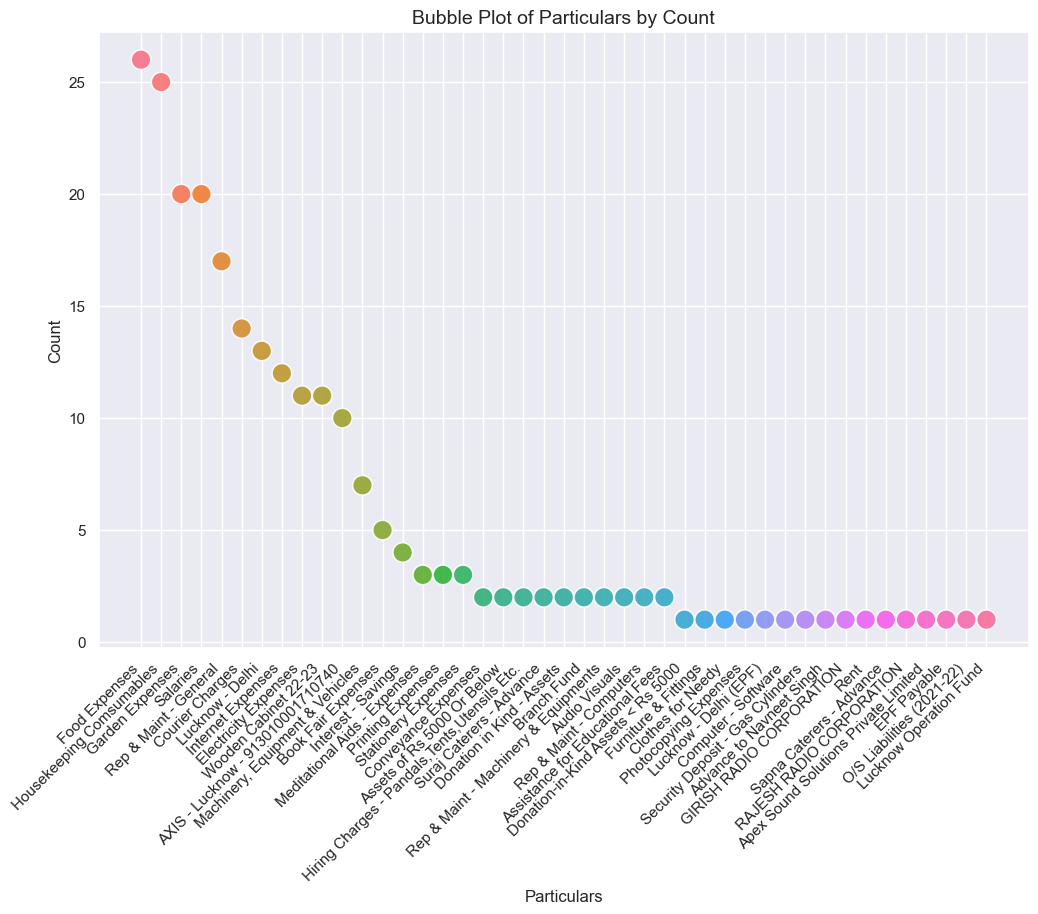

In [73]:
sns.set_theme(style="darkgrid")
# Create a bubble plot with 'Particulars' ordered by their 'count' and represented by bubble size
plt.figure(figsize=(12, 8))
scatter =  sns.scatterplot(data=particularscount, x="Particulars", y="count", s=200, alpha=0.9,hue='Particulars',legend=False)  # Adjust the marker size and transparency

# Rotate x-axis labels for better readability
scatter.set_xticklabels(scatter.get_xticklabels(), rotation=45, horizontalalignment='right')

# Set plot title and axis labels
plt.title('Bubble Plot of Particulars by Count', fontsize=14)
plt.xlabel('Particulars', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()

In [74]:
summary2=df1.groupby(['Particulars']).agg({'Debit': 'sum', 'Credit': 'sum'}).reset_index()
summary2

,Particulars,Debit,Credit
0,RAJESH RADIO CORPORATION,24662.0,0.0
1,AXIS - Lucknow - 913010001710740,0.0,520000.0
2,Advance to Navneet Singh,50936.0,0.0
3,Apex Sound Solutions Private Limited,139440.0,0.0
4,Assets of Rs 5000 Or Below,6499.0,0.0
5,Assistance for Educational Fees,33000.0,0.0
6,Audio Visuals,3000.0,0.0
7,Book Fair Expenses,72744.0,0.0
8,Branch Fund,182683.0,0.0
9,Clothes for Needy,26832.0,0.0


## MAKING USESR INTERACTIVE PIE CHART BY THE USE OF PLOTLY 

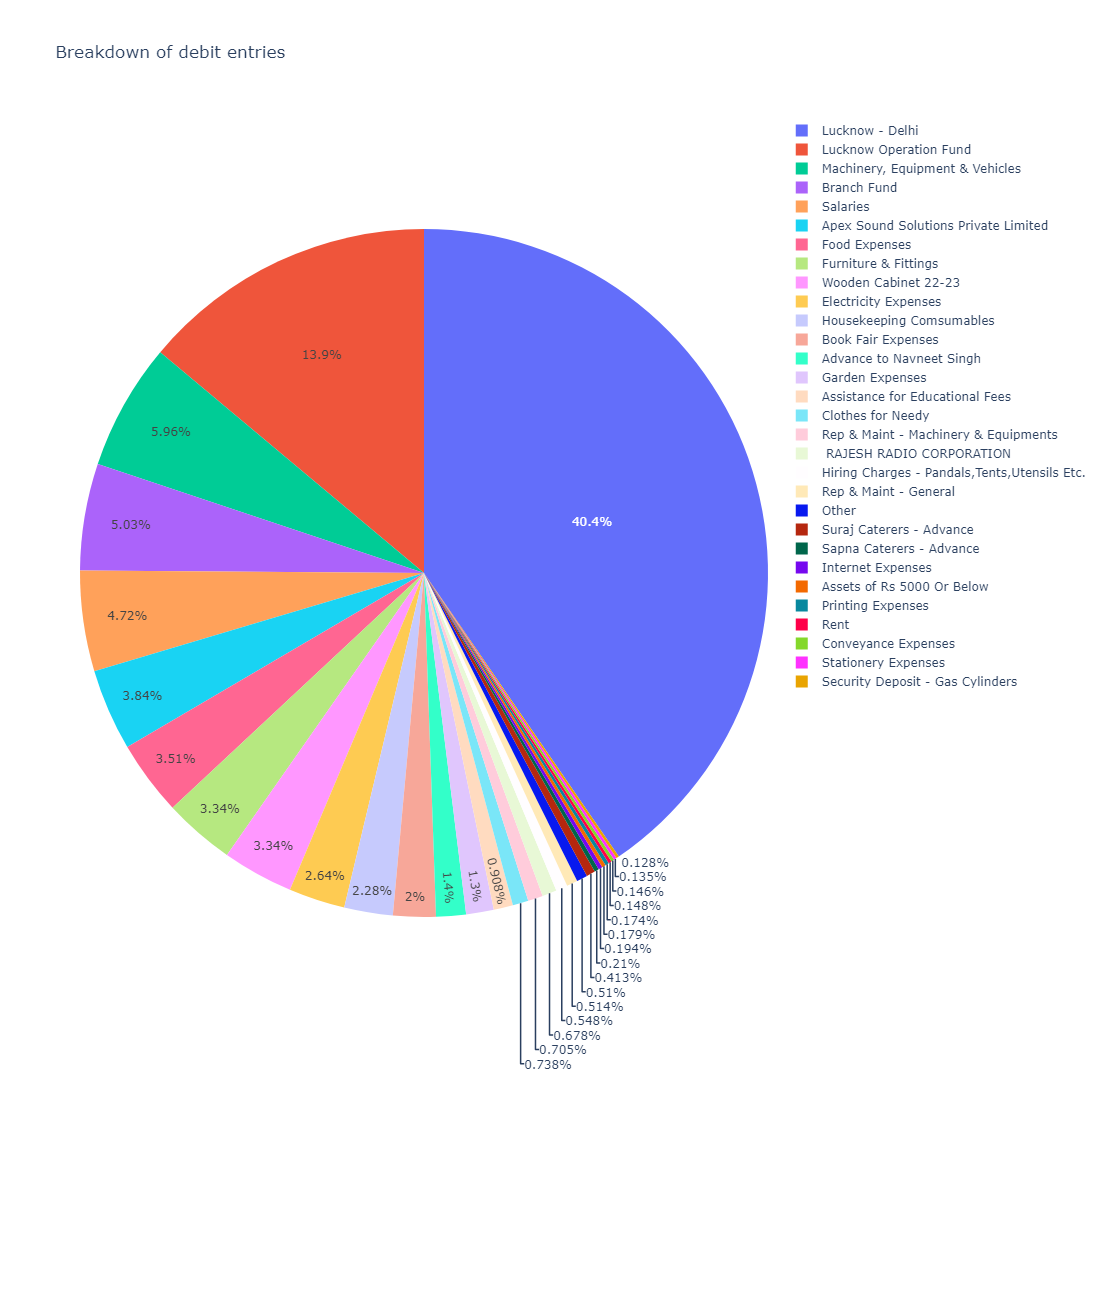

In [75]:

summary2.loc[summary2['Debit'] < 4000, 'Particulars'] = 'Other' 
figdeb = px.pie(summary2, values='Debit', names='Particulars', title='Breakdown of debit entries')
figdeb.update_layout(
    autosize=False,
    width=1000,
    height=1300,
    showlegend=True
)
figdeb.show()

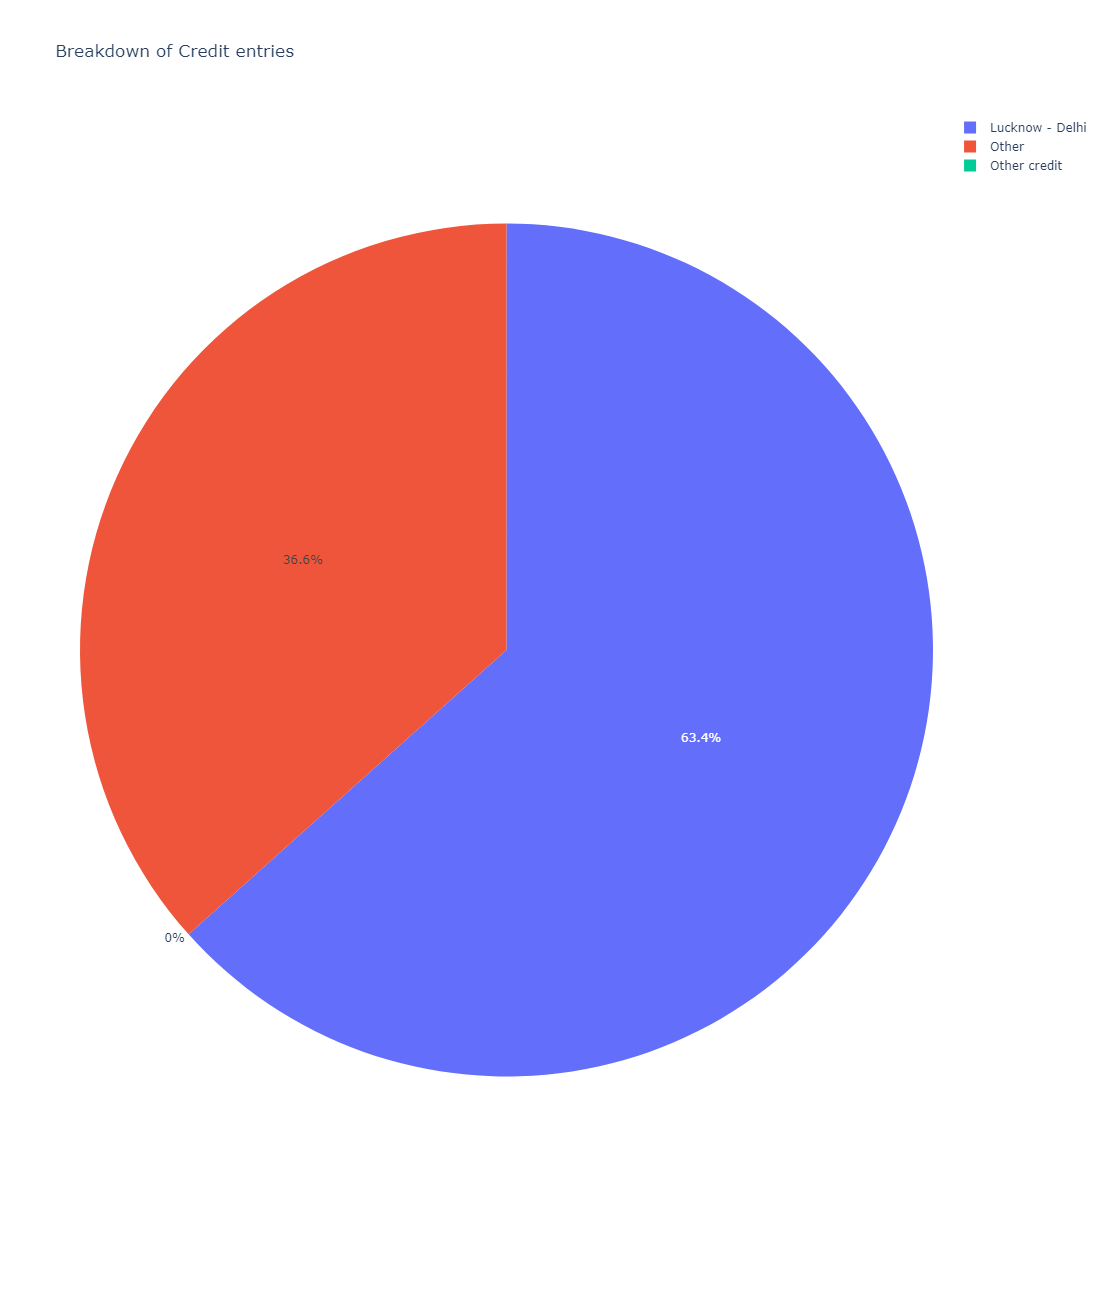

In [76]:
summary2.loc[summary2['Credit'] < 2000, 'Particulars'] = 'Other credit' 
figcre = px.pie(summary2, values='Credit', names='Particulars', title='Breakdown of Credit entries')
figcre.update_layout(
    autosize=False,
    width=1000,
    height=1300,
    showlegend=True
)
figcre.show()

In [77]:
summary3=df1.groupby(['Particulars']).agg({'Debit': 'mean', 'Credit': 'mean'}).reset_index()


In [78]:
df1

,Date,date,month,year,Particulars,Vch Type,Vch No.,Debit,Credit
0,2022-04-01,1,4,2022,Computer - Software,Journal,1,614.0,0.0
1,2022-04-04,4,4,2022,Rep & Maint - General,PMT LUC - CASH,1,200.0,0.0
2,2022-04-15,15,4,2022,Courier Charges,PMT LUC - CASH,2,120.0,0.0
3,2022-04-17,17,4,2022,Garden Expenses,PMT LUC - CASH,3,360.0,0.0
4,2022-04-17,17,4,2022,Rep & Maint - General,PMT LUC - CASH,4,2000.0,0.0
...,...,...,...,...,...,...,...,...,...
235,2023-03-31,31,3,2023,"Machinery, Equipment & Vehicles",Journal,16,200.0,0.0
236,2023-03-31,31,3,2023,Donation in Kind - Assets,Journal,17,200.0,0.0
237,2023-03-31,31,3,2023,Lucknow - Delhi (EPF),Journal,18,3300.0,0.0
238,2023-03-31,31,3,2023,Branch Fund,Journal,19,36301.0,0.0


In [79]:
vouch=df1.groupby(['Vch Type']).agg({'Debit': 'sum', 'Credit': 'sum','Vch No.' : 'max'}).reset_index()
vouch

,Vch Type,Debit,Credit,Vch No.
0,Contra,0.0,520000.0,10
1,Journal,2512933.0,0.0,20
2,PMT LUC - BANK,589201.0,0.0,28
3,PMT LUC - CASH,533317.0,0.0,174
4,RCP LUC - BANK,0.0,939348.0,8


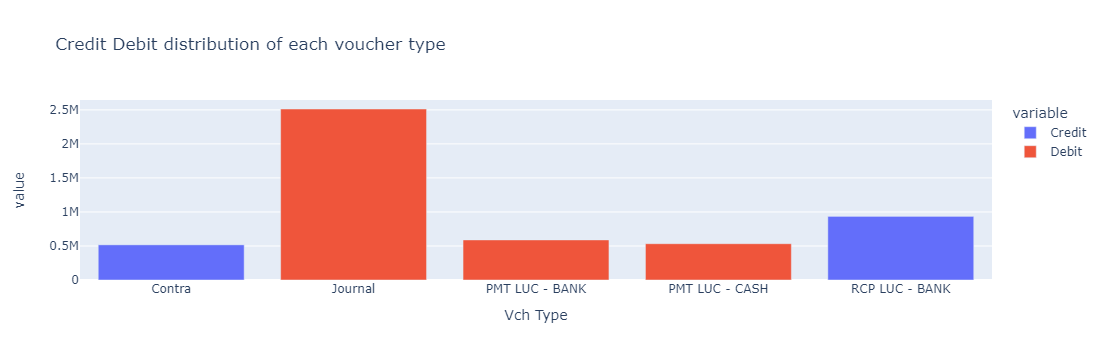

In [80]:
fig = px.bar(vouch, x="Vch Type", y=['Credit','Debit'], title="Credit Debit distribution of each voucher type")
fig.show()

## FINDIND OUTLIERS BY IQR METHOD

<Axes: xlabel='Debit'>

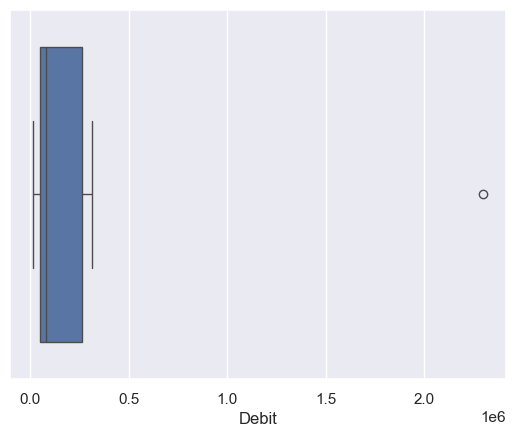

In [81]:
sns.boxplot(x=monthly_summary['Debit'])

In [82]:
monthly_summary

,year,month,Debit,Credit
0,2022,4,11651.0,0.0
1,2022,5,11909.0,50000.0
2,2022,6,27412.0,0.0
3,2022,7,314291.0,571381.0
4,2022,8,300852.0,66933.0
5,2022,9,79477.0,50000.0
6,2022,10,54336.0,377174.0
7,2022,11,142250.0,50000.0
8,2022,12,252184.0,50000.0
9,2023,1,81249.0,162797.0


<Axes: xlabel='Credit'>

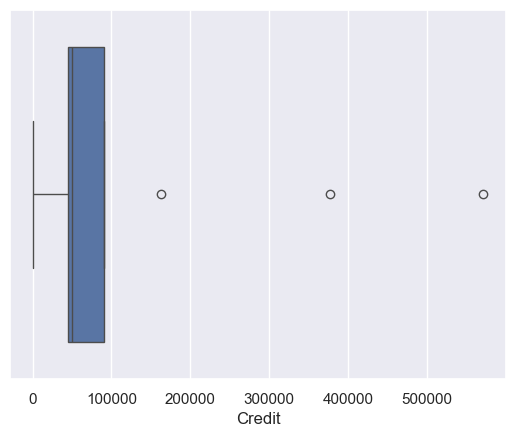

In [83]:
sns.boxplot(x=monthly_summary['Credit'])

In [84]:
Q1 = monthly_summary['Debit'].quantile(0.25)
Q3 = monthly_summary['Debit'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_outliers_debit = monthly_summary[(monthly_summary['Debit'] < lower_bound) | (monthly_summary['Debit'] > upper_bound)]

Q1_c = monthly_summary['Credit'].quantile(0.25)
Q3_c = monthly_summary['Credit'].quantile(0.75)
IQR_c = Q3_c - Q1_c
lower_bound_c = Q1_c - 1.5 * IQR_c
upper_bound_c = Q3_c + 1.5 * IQR_c
df_outliers_credit = monthly_summary[(monthly_summary['Credit'] < lower_bound_c) | (monthly_summary['Credit'] > upper_bound_c)]

print("Outliers in Debit:")
print(df_outliers_debit)
print("\nOutliers in Credit:")
print(df_outliers_credit)

Outliers in Debit:
    year  month      Debit   Credit
11  2023      3  2300009.0  31063.0

Outliers in Credit:
   year  month     Debit    Credit
3  2022      7  314291.0  571381.0
6  2022     10   54336.0  377174.0
9  2023      1   81249.0  162797.0


### PREPROCESING 2ND TALLY

In [85]:
date =df2['Date'].dt.day
month =df2['Date'].dt.month
year=df2['Date'].dt.year
df2.insert(1,'date',date)
df2.insert(2,'month',month)
df2.insert(3,'year',year)

In [86]:
df2=df2.fillna(0)
df2

,Date,date,month,year,Particulars,Vch Type,Vch No.,Debit,Credit
0,2023-04-04,4,4,2023,Printing Expenses,PMT LUC - CASH,1,18.0,0.0
1,2023-04-13,13,4,2023,Courier Charges,PMT LUC - CASH,2,130.0,0.0
2,2023-04-15,15,4,2023,Lucknow - Delhi,RCP LUC - BANK,1,0.0,170000.0
3,2023-04-20,20,4,2023,O/S Liabilities (2022-23),PMT LUC - CASH,3,589.0,0.0
4,2023-04-24,24,4,2023,AXIS - Lucknow - 913010001710740,Contra,1,0.0,30000.0
...,...,...,...,...,...,...,...,...,...
440,2024-03-31,31,3,2024,Internet Expenses,Journal,12,943.0,0.0
441,2024-03-31,31,3,2024,Lucknow - Delhi,Journal,13,766452.0,0.0
442,2024-03-31,31,3,2024,Lucknow - Delhi,Journal,14,116500.0,0.0
443,2024-03-31,31,3,2024,Branch Fund,Journal,15,14600.0,0.0


In [87]:
df1

,Date,date,month,year,Particulars,Vch Type,Vch No.,Debit,Credit
0,2022-04-01,1,4,2022,Computer - Software,Journal,1,614.0,0.0
1,2022-04-04,4,4,2022,Rep & Maint - General,PMT LUC - CASH,1,200.0,0.0
2,2022-04-15,15,4,2022,Courier Charges,PMT LUC - CASH,2,120.0,0.0
3,2022-04-17,17,4,2022,Garden Expenses,PMT LUC - CASH,3,360.0,0.0
4,2022-04-17,17,4,2022,Rep & Maint - General,PMT LUC - CASH,4,2000.0,0.0
...,...,...,...,...,...,...,...,...,...
235,2023-03-31,31,3,2023,"Machinery, Equipment & Vehicles",Journal,16,200.0,0.0
236,2023-03-31,31,3,2023,Donation in Kind - Assets,Journal,17,200.0,0.0
237,2023-03-31,31,3,2023,Lucknow - Delhi (EPF),Journal,18,3300.0,0.0
238,2023-03-31,31,3,2023,Branch Fund,Journal,19,36301.0,0.0


## MAKING A THIRD DATA SET FOR COMMON PARTICULARS IS BOTH THE DATA SET 

In [88]:
# Find common Particulars
common_particulars = list(set(df1['Particulars']).intersection(set(df2['Particulars'])))

# Create a third data frame with values of common Particulars
df3 = pd.concat([df1[df1['Particulars'].isin(common_particulars)],df2[df2['Particulars'].isin(common_particulars)]])


In [89]:
print(common_particulars)

['Courier Charges', 'Meditational Aids - Expenses', 'Machinery, Equipment & Vehicles', 'Lucknow - Delhi', 'AXIS - Lucknow - 913010001710740', 'Printing Expenses', 'Stationery Expenses', 'Hiring Charges - Pandals,Tents,Utensils Etc.', 'Assets of Rs 5000 Or Below', 'Photocopying Expenses', 'Audio Visuals', 'Salaries', 'Garden Expenses', 'Rep & Maint - General', 'Housekeeping Comsumables', 'Rent', 'Assistance for Educational Fees', 'Food Expenses', 'Book Fair Expenses', 'Rep & Maint - Machinery & Equipments', 'Internet Expenses', 'Interest - Savings', 'Conveyance Expenses', 'Electricity Expenses', 'Lucknow Operation Fund', 'Rep & Maint - Computers']


In [90]:
df3

,Date,date,month,year,Particulars,Vch Type,Vch No.,Debit,Credit
1,2022-04-04,4,4,2022,Rep & Maint - General,PMT LUC - CASH,1,200.0,0.0
2,2022-04-15,15,4,2022,Courier Charges,PMT LUC - CASH,2,120.0,0.0
3,2022-04-17,17,4,2022,Garden Expenses,PMT LUC - CASH,3,360.0,0.0
4,2022-04-17,17,4,2022,Rep & Maint - General,PMT LUC - CASH,4,2000.0,0.0
6,2022-04-21,21,4,2022,Electricity Expenses,PMT LUC - BANK,1,1168.0,0.0
...,...,...,...,...,...,...,...,...,...
439,2024-03-31,31,3,2024,Lucknow - Delhi,Journal,11,1086742.0,0.0
440,2024-03-31,31,3,2024,Internet Expenses,Journal,12,943.0,0.0
441,2024-03-31,31,3,2024,Lucknow - Delhi,Journal,13,766452.0,0.0
442,2024-03-31,31,3,2024,Lucknow - Delhi,Journal,14,116500.0,0.0


In [91]:
df3['Particulars'].value_counts()

Particulars
Food Expenses                                   102
Housekeeping Comsumables                         92
Rep & Maint - General                            46
Garden Expenses                                  44
Salaries                                         44
Courier Charges                                  44
Lucknow - Delhi                                  39
AXIS - Lucknow - 913010001710740                 29
Internet Expenses                                26
Electricity Expenses                             23
Meditational Aids - Expenses                     23
Stationery Expenses                              17
Machinery, Equipment & Vehicles                  13
Printing Expenses                                 9
Hiring Charges - Pandals,Tents,Utensils Etc.      8
Interest - Savings                                8
Book Fair Expenses                                7
Rep & Maint - Machinery & Equipments              7
Audio Visuals                                     6


In [92]:
df3.sample(60).reset_index()

,index,Date,date,month,year,Particulars,Vch Type,Vch No.,Debit,Credit
0,368,2024-01-12,12,1,2024,Food Expenses,PMT LUC - CASH,298,7800.0,0.0
1,97,2022-10-01,1,10,2022,Salaries,PMT LUC - BANK,8,15000.0,0.0
2,405,2024-02-27,27,2,2024,Lucknow - Delhi,RCP LUC - BANK,11,0.0,100000.0
3,52,2023-06-30,30,6,2023,Housekeeping Comsumables,PMT LUC - CASH,42,1300.0,0.0
4,378,2024-01-16,16,1,2024,Courier Charges,PMT LUC - CASH,306,130.0,0.0
5,264,2023-09-30,30,9,2023,Food Expenses,PMT LUC - CASH,222,7140.0,0.0
6,272,2023-10-01,1,10,2023,Interest - Savings,RCP LUC - BANK,9,0.0,5408.0
7,43,2022-07-14,14,7,2022,"Hiring Charges - Pandals,Tents,Utensils Etc.",PMT LUC - CASH,35,3920.0,0.0
8,294,2023-10-20,20,10,2023,Housekeeping Comsumables,PMT LUC - CASH,239,184.0,0.0
9,305,2023-11-06,6,11,2023,Lucknow - Delhi,PMT LUC - BANK,34,600.0,0.0


In [93]:
df3.shape

(615, 9)

In [94]:
df1.shape

(240, 9)

In [95]:
df2.shape

(445, 9)


### MAKING COMBOBOX FOR COMPARING DATA ENTERIES IN BOTH THE FINANCIAL YEARS AND PREDICTING THE CREDIT AND DEBIT FOR THE NEXT FY USING LINEAR EXTRAPOLATION


In [96]:
import tkinter as tk
from tkinter import ttk
import pandas as pd

# Function to calculate predicted values for the next financial year
def predict_next_year(fy_sums):
    if len(fy_sums) < 2:
        return None, None
    
    # Avoid division by zero by checking if previous year's value is zero
    if fy_sums[-2][0] == 0:
        avg_debit_growth = 0
    else:
        avg_debit_growth = (fy_sums[-1][0] - fy_sums[-2][0]) / fy_sums[-2][0]
        
    if fy_sums[-2][1] == 0:
        avg_credit_growth = 0
    else:
        avg_credit_growth = (fy_sums[-1][1] - fy_sums[-2][1]) / fy_sums[-2][1]
    
    next_year_debit = fy_sums[-1][0] * (1 + avg_debit_growth)
    next_year_credit = fy_sums[-1][1] * (1 + avg_credit_growth)
    
    return next_year_debit, next_year_credit

# Function to update the listbox with entries corresponding to the selected particular name
def update_listbox(event):
    selected_particular = combo_var.get()
    selected_entries = df3.loc[df3['Particulars'] == selected_particular, ['month', 'year', 'Debit', 'Credit']]
    
    # Filter entries for each financial year
    fy_2022_2023 = selected_entries[(selected_entries['year'] == 2022) | 
                                    ((selected_entries['year'] == 2023) & (selected_entries['month'] <= 3))]
    fy_2023_2024 = selected_entries[(selected_entries['year'] == 2023) & (selected_entries['month'] >= 4)]
    
    # Calculate sums for each financial year
    sum_debit_fy_2022_2023 = fy_2022_2023['Debit'].sum()
    sum_credit_fy_2022_2023 = fy_2022_2023['Credit'].sum()
    sum_debit_fy_2023_2024 = fy_2023_2024['Debit'].sum()
    sum_credit_fy_2023_2024 = fy_2023_2024['Credit'].sum()

    # List of summed values for financial years
    fy_sums = [(sum_debit_fy_2022_2023, sum_credit_fy_2022_2023), (sum_debit_fy_2023_2024, sum_credit_fy_2023_2024)]

    # Predict next year's values
    next_year_debit, next_year_credit = predict_next_year(fy_sums)
    
    listbox.delete(0, tk.END)
    for index, row in selected_entries.iterrows():
        entry_text = f"{int(row['month'])} {int(row['year'])}: Debit - {row['Debit']}, Credit - {row['Credit']}"
        listbox.insert(tk.END, entry_text)
    
    # Display sums
    listbox.insert(tk.END, "")
    listbox.insert(tk.END, f"Total for FY 2022-2023: Debit - {sum_debit_fy_2022_2023}, Credit - {sum_credit_fy_2022_2023}")
    listbox.insert(tk.END, f"Total for FY 2023-2024: Debit - {sum_debit_fy_2023_2024}, Credit - {sum_credit_fy_2023_2024}")
    
    # Display predicted values if available
    if next_year_debit is not None and next_year_credit is not None:
        listbox.insert(tk.END, f"Predicted for FY 2024-2025: Debit - {next_year_debit:.2f}, Credit - {next_year_credit:.2f}")

# Create the main window
root = tk.Tk()
root.title("Entry Viewer")

# Create a combo box to select particular names
combo_var = tk.StringVar()
combo_box = ttk.Combobox(root, textvariable=combo_var)
unique_values = df3['Particulars'].unique()
combo_box['values'] = unique_values.tolist()  # Convert to list if necessary
combo_box.grid(row=0, column=0, padx=10, pady=10)
combo_box.bind('<<ComboboxSelected>>', update_listbox)

# Create a listbox to display entries
listbox = tk.Listbox(root, width=50, height=20)
listbox.grid(row=1, column=0, padx=10, pady=10)

# Function to initialize listbox with entries for initial selection
def initialize_listbox():
    selected_particular = combo_var.get()
    selected_entries = df3[df3['Particulars'] == selected_particular]
    
    listbox.delete(0, tk.END)
    for index, row in selected_entries.iterrows():
        entry_text = f"{int(row['month'])} {int(row['year'])}: Debit - {row['Debit']}, Credit - {row['Credit']}"
        listbox.insert(tk.END, entry_text)

    # Initialize sums for the first particular name
    update_listbox(None)

# Initialize with the first particular name
initial_particular = unique_values[0]  # Select the first unique item in the list
combo_var.set(initial_particular)
initialize_listbox()  # Initialize listbox with entries for initial selection

# Start the Tkinter event loop
root.mainloop()
